In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Raw data
data_raw = np.loadtxt("lidar_data_20201026.csv", delimiter=',', skiprows=1)

# Extract list of range data from raw data
data = data_raw.T[1]

# Check length
len(data)

# Remove data with a value less than 6500
data = data[data > 6500]
len(data)

8819

In [18]:
data_m = data / 1000
data_m

print(data_m.mean())
print(data_m.std())

6.874889103072912
0.016552210800017474


In [16]:
mean = data.mean()
std = data.std()
print(mean)
print(std)

def p(x, mu, std):
    return math.exp(-(x - mu)**2 / (2 * std**2)) / math.sqrt(2 * math.pi * std**2)

xs = np.arange(6500, 7500)
ys = [p(x, mean, std) for x in xs]

6874.889103072911
16.552210800017534


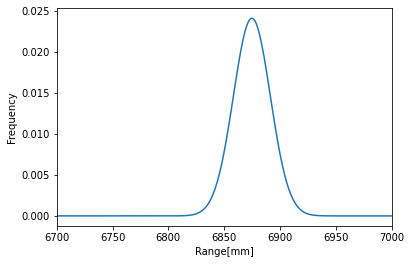

In [17]:
# Prepare graph axes
fig = plt.figure()
ax = fig.add_subplot(111,
                    xlabel="Range[mm]",
                    ylabel="Frequency")
ax.set_xlim([6700, 7000])

# Plot histogram
#ax.hist(data, bins='auto', histtype='bar', align='left', density=True)

# Plot Gaussian
ax.plot(xs, ys)

# Save as PDF
plt.savefig("histogram.pdf")